# AML Project: American Sign Language Recogntition using Deep Learning
Implemented By:
1. Sushant Kotwal(skotwal)
2. Tejas Ram Ramesh(terame)
3. Atharva Pandit(atpand)




For Implementing this project we used the following References:
1. https://www.youtube.com/watch?v=6Bn0PY_ouBY
2. https://www.youtube.com/watch?v=YjnGou4skGU
3. https://www.youtube.com/watch?v=3hjsdfTVWRQ&t=699s
4. HOML Book - By Aurelien Geron
5. Deep Learning with Python - By Fancois Chollet 
6. https://towardsdatascience.com/american-sign-language-recognition-using-cnn-36910b86d651
7. https://data-flair.training/blogs/sign-language-recognition-python-ml-opencv/

Note: Run this notebook in VisualStudio or any other IDE. The google colab does not support some of the functions of cv2 library needed to run this file

In [ ]:
# Importing the Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
import cv2
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score
import os
import tensorflow.keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
train_set = pd.read_csv("C:/Users/Sushant/Downloads/archive/sign_mnist_train.csv")
test_set = pd.read_csv("C:/Users/Sushant/Downloads/archive/sign_mnist_test.csv")

In [ ]:
# Inspect our Training data
train_set.head()

label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel781  pixel782  pixel783  pixel784  
0       206       204       203       202  
1       175       103       135       149  
2       198       195       194       195  
3       225       222       229       163  
4       157       163       164       179  

[5 rows x 785 columns]

In [ ]:
# Description of our training set
train_set.describe()

label        pixel1        pixel2        pixel3        pixel4  \
count  27455.000000  27455.000000  27455.000000  27455.000000  27455.000000   
mean      12.318813    145.419377    148.500273    151.247714    153.546531   
std        7.287552     41.358555     39.942152     39.056286     38.595247   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        6.000000    121.000000    126.000000    130.000000    133.000000   
50%       13.000000    150.000000    153.000000    156.000000    158.000000   
75%       19.000000    174.000000    176.000000    178.000000    179.000000   
max       24.000000    255.000000    255.000000    255.000000    255.000000   

             pixel5        pixel6        pixel7        pixel8        pixel9  \
count  27455.000000  27455.000000  27455.000000  27455.000000  27455.000000   
mean     156.210891    158.411255    160.472154    162.339683    163.954799   
std       37.111165     36.125579     35.016392     33.661998     32.651607   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      137.000000    140.000000    142.000000    144.000000    146.000000   
50%      160.000000    162.000000    164.000000    165.000000    166.000000   
75%      181.000000    182.000000    183.000000    184.000000    185.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

       ...      pixel775      pixel776      pixel777      pixel778  \
count  ...  27455.000000  27455.000000  27455.000000  27455.000000   
mean   ...    141.104863    147.495611    153.325806    159.125332   
std    ...     63.751194     65.512894     64.427412     63.708507   
min    ...      0.000000      0.000000      0.000000      0.000000   
25%    ...     92.000000     96.000000    103.000000    112.000000   
50%    ...    144.000000    162.000000    172.000000    180.000000   
75%    ...    196.000000    202.000000    205.000000    207.000000   
max    ...    255.000000    255.000000    255.000000    255.000000   

           pixel779      pixel780      pixel781      pixel782      pixel783  \
count  27455.000000  27455.000000  27455.000000  27455.000000  27455.000000   
mean     161.969259    162.736696    162.906137    161.966454    161.137898   
std       63.738316     63.444008     63.509210     63.298721     63.610415   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%      120.000000    125.000000    128.000000    128.000000    128.000000   
50%      183.000000    184.000000    184.000000    182.000000    182.000000   
75%      208.000000    207.000000    207.000000    206.000000    204.000000   
max      255.000000    255.000000    255.000000    255.000000    255.000000   

           pixel784  
count  27455.000000  
mean     159.824731  
std       64.396846  
min        0.000000  
25%      125.500000  
50%      182.000000  
75%      204.000000  
max      255.000000  

[8 rows x 785 columns]

In [ ]:
# Checking the overall information of training set 
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


<AxesSubplot:ylabel='count'>

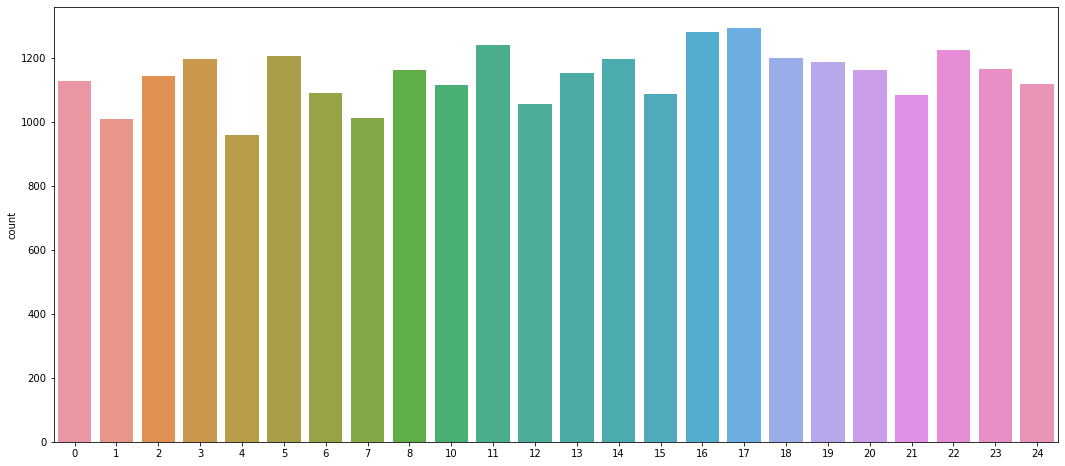

In [ ]:
# Checking the distribution of labels
label_values = train_set['label'].values
plt.figure(figsize = (18,8))
sns.countplot(x =label_values)

### This can be said to be a balanced dataset. The number of labels are in the range 900 to slightly above 1200

In [ ]:
training_array = np.array(train_set, dtype = 'float32')
testing_array = np.array(test_set, dtype = 'float32')

In [ ]:
X_train = training_array[:, 1:] /255
X_test = testing_array[:, 1:] /255

X_train = X_train.reshape(len(train_set), *(28, 28, 1))
X_test = X_test.reshape(len(test_set), *(28, 28, 1))


y_train = training_array[:, 0]
y_test = testing_array[:,0]

y_train_cat = to_categorical(y_train, num_classes=25)
y_test_cat = to_categorical(y_test, num_classes=25)

In [ ]:
# Here we create our labels for all alphabets excepts J and Z since their gesture involve a continous motion
labels = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y' ]

In [ ]:
# Start loading our tensorFlow modules and define our batch size etc
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout

batch_size = 128
num_classes = 25
epochs = 10

In [ ]:
# CNN Model
model = Sequential()
model.add(Conv2D(64, kernel_size=(3,3), activation='relu',input_shape= (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.20))

model.add(Dense(num_classes,activation='softmax'))

In [ ]:
# Compiling the model
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

In [ ]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 1, 1, 64)         0

In [ ]:
# Model Training
model_train = model.fit(X_train,y_train_cat,validation_data=(X_test, y_test_cat),epochs=epochs,batch_size=batch_size)

Epoch 1/10
215/215 [==============================] - 34s 154ms/step - loss: 2.1894 - accuracy: 0.3249 - val_loss: 1.0104 - val_accuracy: 0.6630
Epoch 2/10
215/215 [==============================] - 31s 143ms/step - loss: 0.7063 - accuracy: 0.7616 - val_loss: 0.6540 - val_accuracy: 0.7790
Epoch 3/10
215/215 [==============================] - 36s 165ms/step - loss: 0.3595 - accuracy: 0.8785 - val_loss: 0.5327 - val_accuracy: 0.8140
Epoch 4/10
215/215 [==============================] - 41s 190ms/step - loss: 0.1919 - accuracy: 0.9384 - val_loss: 0.4934 - val_accuracy: 0.8473
Epoch 5/10
215/215 [==============================] - 41s 192ms/step - loss: 0.1051 - accuracy: 0.9697 - val_loss: 0.5082 - val_accuracy: 0.8642
Epoch 6/10
215/215 [==============================] - 35s 164ms/step - loss: 0.0703 - accuracy: 0.9796 - val_loss: 0.4841 - val_accuracy: 0.8783
Epoch 7/10
215/215 [==============================] - 40s 185ms/step - loss: 0.0463 - accuracy: 0.9878 - val_loss: 0.4552 - val_ac

In [ ]:
# Saving the Model
model.save("Model1.h5")
print("Model Saved")

Model Saved


### Plotting the learning curves for our model

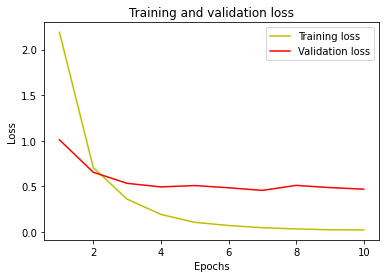

In [ ]:
loss = model_train.history['loss']
val_loss = model_train.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

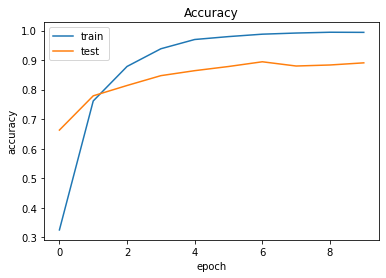

In [ ]:
# View our training history graphically
plt.plot(model_train.history['accuracy'])
plt.plot(model_train.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [ ]:
predictions=model.predict(X_test) 
classes=np.argmax(predictions,axis=1)

In [ ]:
from sklearn.metrics import accuracy_score, f1_score
accuracy = accuracy_score(y_test, classes)
f1 = f1_score(y_test, classes,average='micro')
f1_macro = f1_score(y_test, classes,average='macro')
f1_wgt = f1_score(y_test, classes,average='weighted')
print('Accuracy Score = ', accuracy)
print('F1 Micro Score = ', f1)
print('F1 Macro Score = ', f1_macro)
print('F1 Weighted Score = ', f1_wgt)

Accuracy Score =  0.8906860011154489
F1 Micro Score =  0.8906860011154489
F1 Macro Score =  0.8814852827284719
F1 Weighted Score =  0.8903775368644098


In [ ]:
print(classification_report(y_test, classes))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       331
         1.0       1.00      0.91      0.95       432
         2.0       0.89      0.87      0.88       310
         3.0       1.00      0.84      0.92       245
         4.0       0.89      1.00      0.94       498
         5.0       1.00      1.00      1.00       247
         6.0       0.69      0.77      0.73       348
         7.0       0.99      0.95      0.97       436
         8.0       1.00      0.88      0.94       288
        10.0       0.91      0.87      0.89       331
        11.0       0.89      0.98      0.93       209
        12.0       0.92      0.88      0.90       394
        13.0       0.93      0.83      0.88       291
        14.0       0.89      0.76      0.82       246
        15.0       1.00      1.00      1.00       347
        16.0       0.81      1.00      0.89       164
        17.0       0.65      0.76      0.70       144
        18.0       0.82    

### Here we saw that this model overfits on the data. The reason is because of the high number of neurons used in the CNN model. So now we add a dropout layer after each Pooling layer with a dropout rate 0f 30%

In [ ]:
# Tejas
model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model_2.add(MaxPooling2D(pool_size = (2, 2)))
model_2.add(Dropout(0.3))

model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size = (2, 2)))
model_2.add(Dropout(0.3))

model_2.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size = (2, 2)))
model_2.add(Dropout(0.3))

model_2.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size = (2, 2)))
model_2.add(Dropout(0.3))

model_2.add(Flatten())

model_2.add(Dense(128, activation = 'relu'))
model_2.add(Dense(25, activation = 'softmax'))

In [ ]:
model_2.compile(loss ='categorical_crossentropy', optimizer='adam', metrics =['accuracy'])
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 64)         

In [ ]:
model_train_2 = model_2.fit(X_train,y_train_cat,validation_data=(X_test, y_test_cat),epochs=10,batch_size=256)

Epoch 1/10
108/108 [==============================] - 22s 195ms/step - loss: 2.9211 - accuracy: 0.1158 - val_loss: 2.1725 - val_accuracy: 0.3349
Epoch 2/10
108/108 [==============================] - 22s 201ms/step - loss: 1.6303 - accuracy: 0.4623 - val_loss: 1.0470 - val_accuracy: 0.6446
Epoch 3/10
108/108 [==============================] - 23s 207ms/step - loss: 0.8823 - accuracy: 0.6936 - val_loss: 0.5914 - val_accuracy: 0.7931
Epoch 4/10
108/108 [==============================] - 23s 216ms/step - loss: 0.5790 - accuracy: 0.7992 - val_loss: 0.4323 - val_accuracy: 0.8388
Epoch 5/10
108/108 [==============================] - 23s 216ms/step - loss: 0.4246 - accuracy: 0.8514 - val_loss: 0.3292 - val_accuracy: 0.8755
Epoch 6/10
108/108 [==============================] - 24s 218ms/step - loss: 0.3214 - accuracy: 0.8873 - val_loss: 0.2464 - val_accuracy: 0.9195
Epoch 7/10
108/108 [==============================] - 23s 216ms/step - loss: 0.2491 - accuracy: 0.9141 - val_loss: 0.2214 - val_ac

In [ ]:
# Saving our Model
model_2.save("Model2.h5")
print("Model Saved")

Model Saved


### Learning Curves for the 2nd Model

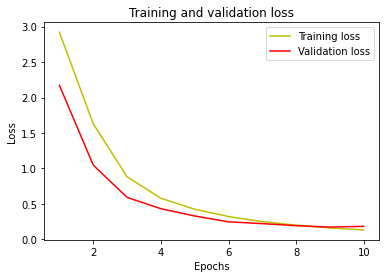

In [ ]:
loss = model_train_2.history['loss']
val_loss = model_train_2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

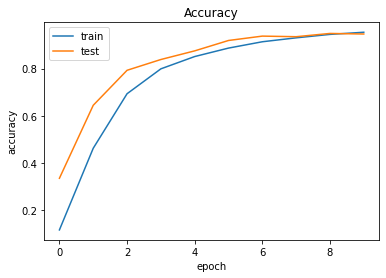

In [ ]:
# View our training history graphically
plt.plot(model_train_2.history['accuracy'])
plt.plot(model_train_2.history['val_accuracy'])
plt.title("Accuracy")
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'])

plt.show()

In [ ]:
predictions_2=model_2.predict(X_test) 
classes_2=np.argmax(predictions_2,axis=1)

In [ ]:
accuracy = accuracy_score(y_test, classes_2)
f1 = f1_score(y_test, classes_2,average='micro')
f1_macro = f1_score(y_test, classes_2,average='macro')
f1_wgt = f1_score(y_test, classes_2,average='weighted')
print('Accuracy Score = ', accuracy)
print('F1 Micro Score = ', f1)
print('F1 Macro Score = ', f1_macro)
print('F1 Weighted Score = ', f1_wgt)

Accuracy Score =  0.947016174010039
F1 Micro Score =  0.947016174010039
F1 Macro Score =  0.9434506625628941
F1 Weighted Score =  0.9456151841405627


In [ ]:
print(classification_report(y_test, classes_2))

              precision    recall  f1-score   support

         0.0       0.81      1.00      0.89       331
         1.0       1.00      1.00      1.00       432
         2.0       0.95      1.00      0.97       310
         3.0       1.00      0.91      0.96       245
         4.0       0.92      1.00      0.96       498
         5.0       1.00      1.00      1.00       247
         6.0       0.94      0.96      0.95       348
         7.0       0.91      0.95      0.93       436
         8.0       0.88      1.00      0.94       288
        10.0       0.94      0.97      0.96       331
        11.0       0.99      1.00      1.00       209
        12.0       0.97      0.92      0.94       394
        13.0       0.96      0.71      0.81       291
        14.0       1.00      1.00      1.00       246
        15.0       1.00      1.00      1.00       347
        16.0       0.91      1.00      0.95       164
        17.0       0.87      0.85      0.86       144
        18.0       0.97    

### From the learning curves, accuracy scores and classification report we see that this model fits very well on the data and we get a good accuracy for the model. So now we test this model on the live input from webcam

In [ ]:
# Create function to match label to letter
def getLetter(result):
    classLabels = { 0: 'A',
                    1: 'B',
                    2: 'C',
                    3: 'D',
                    4: 'E',
                    5: 'F',
                    6: 'G',
                    7: 'H',
                    8: 'I',
                    9: 'K',
                    10: 'L',
                    11: 'M',
                    12: 'N',
                    13: 'O',
                    14: 'P',
                    15: 'Q',
                    16: 'R',
                    17: 'S',
                    18: 'T',
                    19: 'U',
                    20: 'V',
                    21: 'W',
                    22: 'X',
                    23: 'Y'}
    try:
        res = int(result)
        return classLabels[res]
    except:
        return "Error"

### Testing on live input

In [ ]:
# Model 2
# Starting the real time video capturing from webcam
cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    
    frame=cv2.flip(frame, 1)

    #ROI(Region of Interest)
    roi = frame[100:400, 320:620]

    #Displaying the ROI frame on webcam
    cv2.imshow('roi', roi)

    # Applying grayscale color format to the ROI
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation = cv2.INTER_AREA)

    
    cv2.imshow('roi sacled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255,0,0), 5)
    
    roi = roi.reshape(1,28,28,1) 

    # Prediction Based on the Hand Gesture
    result = model_2.predict(roi,1,verbose=0)[0]
    res = np.argmax(result)
    cv2.putText(copy, getLetter(str(res)), (300 , 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame', copy)    
    
    #Enter Key
    if cv2.waitKey(1) == 13:
        break

# Stop The Webcam
cap.release()
cv2.destroyAllWindows()

### Here we saw that our model performed very poorly on the live data. This is mainly because live data is very different from the static images that we trained on. There seemed to be no variation in data in terms of image depth, lighting, hand orientation and size. So to solve this problem we generate our own data for training.

In [ ]:
# Function to create directory of images
def makedir(directory):
    if not os.path.exists(directory):
        os.makedirs(directory)
        return None
    else:
        pass

### Here we create our dataset for every hand gesture. We are creating training and testing data here itself. Since we are generating the images we can specify any number of images for hand gestures that we want. Thus there will be no problem of class imbalance here. 

In [ ]:
cap = cv2.VideoCapture(0)
i=0
image_count = 0
    
while i < 10:

    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)

    #ROI(Region of Interest)
    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation = cv2.INTER_AREA)

    cv2.imshow('roi sacled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255,0,0), 5)
    
    if i == 0:
        image_count = 0
        cv2.putText(copy, "Hit Enter to Record when ready", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
    if i == 1:
        image_count+=1
        cv2.putText(copy, "Recording 1st gesture - Train", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        # Training Images are Stored in this directory where each label has its respective gesture
        gesture_one = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/train/A/'
        makedir(gesture_one)
        cv2.imwrite(gesture_one + str(image_count) + ".jpg", roi)
    if i == 2:
        image_count+=1
        cv2.putText(copy, "Recording 1st gesture - Test", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        # Testing Images are Stored in this directory where each label has its respective gesture
        gesture_one = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/test/A/'
        makedir(gesture_one)
        cv2.imwrite(gesture_one + str(image_count) + ".jpg", roi)
    if i == 3:
        cv2.putText(copy, "Hit Enter to Record when ready to Record 2nd gesture", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
    if i == 4:
        image_count+=1
        cv2.putText(copy, "Recording 2nd gesture - Train", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/train/B/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)
    if i == 5:
        image_count+=1
        cv2.putText(copy, "Recording 2nd gesture - Test", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/test/B/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)

    if i==6:
        cv2.putText(copy, "Hit Enter to Record when ready to Record 3rd gesture", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)

    if i==7:
        image_count+=1
        cv2.putText(copy, "Recording 3rd gesture - Train", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/train/C/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)
    if i==8:
        image_count+=1
        cv2.putText(copy, "Recording 3rd gesture - Test", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/test/C/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)
    if i == 9:
        cv2.putText(copy, "Hit Enter to Exit", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
    cv2.imshow('frame', copy)    

    #Enter Key
    if cv2.waitKey(1) == 13:
        image_count = 0
        i+=1

cap.release()
cv2.destroyAllWindows() 

In [ ]:
cap = cv2.VideoCapture(0)

i=0
image_count = 0
    
while i < 64:

    ret, frame = cap.read()
    frame = cv2.flip(frame, 1)

    #ROI(Region of Interest)
    roi = frame[100:400, 320:620]
    cv2.imshow('roi', roi)
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation = cv2.INTER_AREA)

    cv2.imshow('roi sacled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255,0,0), 5)
    
    if i == 0:
        image_count = 0
        cv2.putText(copy, "Hit Enter to Record when ready", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
    if i == 1:
        image_count+=1
        cv2.putText(copy, "Recording 4th gesture - Train", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_one = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/train/D/'
        makedir(gesture_one)
        cv2.imwrite(gesture_one + str(image_count) + ".jpg", roi)
    if i == 2:
        image_count+=1
        cv2.putText(copy, "Recording 4th gesture - Test", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_one = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/test/D/'
        makedir(gesture_one)
        cv2.imwrite(gesture_one + str(image_count) + ".jpg", roi)
    if i == 3:
        cv2.putText(copy, "Hit Enter to Record when ready to Record 5th gesture", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
    if i == 4:
        image_count+=1
        cv2.putText(copy, "Recording 5th gesture - Train", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/train/E/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)
    if i == 5:
        image_count+=1
        cv2.putText(copy, "Recording 5th gesture - Test", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/test/E/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)

    if i==6:
        cv2.putText(copy, "Hit Enter to Record when ready to Record 6th gesture", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)

    if i==7:
        image_count+=1
        cv2.putText(copy, "Recording 6th gesture - Train", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/train/F/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)
    if i==8:
        image_count+=1
        cv2.putText(copy, "Recording 6th gesture - Test", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/test/F/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)



    if i == 9:
        cv2.putText(copy, "Hit Enter to Record when ready to Record 7th gesture", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
    if i == 10:
        image_count+=1
        cv2.putText(copy, "Recording 7th gesture - Train", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/train/G/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)
    if i == 11:
        image_count+=1
        cv2.putText(copy, "Recording 7th gesture - Test", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/test/G/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)

    if i==12:
        cv2.putText(copy, "Hit Enter to Record when ready to Record 8th gesture", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)

    if i==13:
        image_count+=1
        cv2.putText(copy, "Recording 8th gesture - Train", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/train/H/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)
    if i==14:
        image_count+=1
        cv2.putText(copy, "Recording 8th gesture - Test", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/test/H/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)



    if i == 15:
        cv2.putText(copy, "Hit Enter to Record when ready to Record 9th gesture", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
    if i == 16:
        image_count+=1
        cv2.putText(copy, "Recording 9th gesture - Train", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/train/I/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)
    if i == 17:
        image_count+=1
        cv2.putText(copy, "Recording 9th gesture - Test", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/test/I/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)

    if i==18:
        cv2.putText(copy, "Hit Enter to Record when ready to Record 10th gesture", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)

    if i==19:
        image_count+=1
        cv2.putText(copy, "Recording 10th gesture - Train", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/train/K/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)
    if i==20:
        image_count+=1
        cv2.putText(copy, "Recording 10th gesture - Test", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/test/K/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)




    if i == 21:
        cv2.putText(copy, "Hit Enter to Record when ready to Record 11th gesture", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
    if i == 22:
        image_count+=1
        cv2.putText(copy, "Recording 11th gesture - Train", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/train/L/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)
    if i == 23:
        image_count+=1
        cv2.putText(copy, "Recording 11th gesture - Test", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/test/L/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)

    if i==24:
        cv2.putText(copy, "Hit Enter to Record when ready to Record 12th gesture", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)

    if i==25:
        image_count+=1
        cv2.putText(copy, "Recording 12th gesture - Train", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/train/M/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)
    if i==26:
        image_count+=1
        cv2.putText(copy, "Recording 12th gesture - Test", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/test/M/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)



    

    if i == 27:
        cv2.putText(copy, "Hit Enter to Record when ready to Record 13th gesture", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
    if i == 28:
        image_count+=1
        cv2.putText(copy, "Recording 13th gesture - Train", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/train/N/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)
    if i == 29:
        image_count+=1
        cv2.putText(copy, "Recording 13th gesture - Test", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/test/N/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)

    if i==30:
        cv2.putText(copy, "Hit Enter to Record when ready to Record 14th gesture", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)

    if i==31:
        image_count+=1
        cv2.putText(copy, "Recording 14th gesture - Train", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/train/O/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)
    if i==32:
        image_count+=1
        cv2.putText(copy, "Recording 14th gesture - Test", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/test/O/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)





    if i == 33:
        cv2.putText(copy, "Hit Enter to Record when ready to Record 15th gesture", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
    if i == 34:
        image_count+=1
        cv2.putText(copy, "Recording 15th gesture - Train", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/train/P/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)
    if i == 35:
        image_count+=1
        cv2.putText(copy, "Recording 15th gesture - Test", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/test/P/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)

    if i==36:
        cv2.putText(copy, "Hit Enter to Record when ready to Record 16th gesture", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)

    if i==37:
        image_count+=1
        cv2.putText(copy, "Recording 16th gesture - Train", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/train/Q/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)
    if i==38:
        image_count+=1
        cv2.putText(copy, "Recording 16th gesture - Test", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/test/Q/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)

    if i == 39:
        cv2.putText(copy, "Hit Enter to Record when ready to Record 17th gesture", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
    if i == 40:
        image_count+=1
        cv2.putText(copy, "Recording 17th gesture - Train", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/train/R/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)
    if i == 41:
        image_count+=1
        cv2.putText(copy, "Recording 17th gesture - Test", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/test/R/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)

    if i==42:
        cv2.putText(copy, "Hit Enter to Record when ready to Record 18th gesture", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)

    if i==43:
        image_count+=1
        cv2.putText(copy, "Recording 18th gesture - Train", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/train/S/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)
    if i==44:
        image_count+=1
        cv2.putText(copy, "Recording 18th gesture - Test", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/test/S/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)



    if i == 45:
        cv2.putText(copy, "Hit Enter to Record when ready to Record 19th gesture", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
    if i == 46:
        image_count+=1
        cv2.putText(copy, "Recording 19th gesture - Train", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/train/T/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)
    if i == 47:
        image_count+=1
        cv2.putText(copy, "Recording 19th gesture - Test", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/test/T/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)

    if i==48:
        cv2.putText(copy, "Hit Enter to Record when ready to Record 20th gesture", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)

    if i==49:
        image_count+=1
        cv2.putText(copy, "Recording 20th gesture - Train", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/train/U/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)
    if i==50:
        image_count+=1
        cv2.putText(copy, "Recording 20th gesture - Test", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/test/U/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)



    if i == 51:
        cv2.putText(copy, "Hit Enter to Record when ready to Record 21st gesture", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
    if i == 52:
        image_count+=1
        cv2.putText(copy, "Recording 21st gesture - Train", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/train/V/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)
    if i == 53:
        image_count+=1
        cv2.putText(copy, "Recording 21st gesture - Test", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/test/V/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)

    if i==54:
        cv2.putText(copy, "Hit Enter to Record when ready to Record 22nd gesture", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)

    if i==55:
        image_count+=1
        cv2.putText(copy, "Recording 22nd gesture - Train", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/train/W/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)
    if i==56:
        image_count+=1
        cv2.putText(copy, "Recording 22nd gesture - Test", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/test/W/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)



    if i == 57:
        cv2.putText(copy, "Hit Enter to Record when ready to Record 23rd gesture", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
    if i == 58:
        image_count+=1
        cv2.putText(copy, "Recording 23rd gesture - Train", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/train/X/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)
    if i == 59:
        image_count+=1
        cv2.putText(copy, "Recording 23rd gesture - Test", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/test/X/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)

    if i==60:
        cv2.putText(copy, "Hit Enter to Record when ready to Record 24th gesture", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)

    if i==61:
        image_count+=1
        cv2.putText(copy, "Recording 24th gesture - Train", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/train/Y/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)
    if i==62:
        image_count+=1
        cv2.putText(copy, "Recording 24th gesture - Test", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        cv2.putText(copy, str(image_count), (400 , 400), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
        gesture_two = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/test/Y/'
        makedir(gesture_two)
        cv2.imwrite(gesture_two + str(image_count) + ".jpg", roi)

    if i == 63:
        cv2.putText(copy, "Hit Enter to Exit", (100 , 100), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 1)
    cv2.imshow('frame', copy)    

    #Enter Key
    if cv2.waitKey(1) == 13: 
        image_count = 0
        i+=1

cap.release()
cv2.destroyAllWindows() 

### Now that tne images have been created, we further enhance this data by applying additional styling and transformation to the images. This involves shifting the image, rotating or flipping the image. We also convert the generated images to grayscale format since the captured images were in RGB format. So we need to convert them to grayscale before giving them as input to the CNN model.

In [ ]:
num_classes = 24
img_rows, img_cols = 28, 28
batch_size = 120

# Defining directories for training and testing images
train_data_dir = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/train'
validation_data_dir = 'C:/Users/Sushant/Desktop/Applied Machine Learning/Assignments/Project/handgestures/test'


# Applying different transformations on the training images
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=30,
      width_shift_range=0.3,
      height_shift_range=0.3,
      horizontal_flip=True,
      fill_mode='nearest')
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
 # Converting the training images to grayscale
train_generator = train_datagen.flow_from_directory(
        train_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        color_mode = 'grayscale',
        class_mode='categorical')
 
  # Converting the testing images to grayscale
validation_generator = validation_datagen.flow_from_directory(
        validation_data_dir,
        target_size=(img_rows, img_cols),
        batch_size=batch_size,
        color_mode = 'grayscale',
        class_mode='categorical')

Found 50760 images belonging to 24 classes.
Found 22744 images belonging to 24 classes.


### After augmentation, a total of 50760 images were created having the specified styling and transformation for training the model and a total of 22744 images were created for validation set

In [ ]:
#Model 3
model_3 = Sequential()
model_3.add(Conv2D(64, kernel_size=(3,3), activation = 'relu', input_shape=(28,28,1) ))
model_3.add(MaxPooling2D(pool_size = (2, 2)))

model_3.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model_3.add(MaxPooling2D(pool_size = (2, 2)))

model_3.add(Conv2D(64, kernel_size = (3, 3), activation = 'relu'))
model_3.add(MaxPooling2D(pool_size = (2, 2)))

model_3.add(Flatten())
model_3.add(Dense(128, activation = 'relu'))
model_3.add(Dropout(0.20))

model_3.add(Dense(24, activation = 'softmax'))

print(model.summary())

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_50 (Conv2D)          (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_46 (MaxPoolin  (None, 13, 13, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_51 (Conv2D)          (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_47 (MaxPoolin  (None, 5, 5, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_52 (Conv2D)          (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_48 (MaxPoolin  (None, 1, 1, 64)       

### Model Training on the Augmented Dataset

In [ ]:
model_3.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

nb_train_samples = 50760
nb_validation_samples = 22744 
epochs = 50

history = model_3.fit(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/50
423/423 [==============================] - 107s 249ms/step - loss: 3.0635 - accuracy: 0.0828 - val_loss: 2.7215 - val_accuracy: 0.2590
Epoch 2/50
423/423 [==============================] - 115s 272ms/step - loss: 2.8043 - accuracy: 0.1529 - val_loss: 2.1315 - val_accuracy: 0.3199
Epoch 3/50
423/423 [==============================] - 105s 248ms/step - loss: 2.5859 - accuracy: 0.2112 - val_loss: 1.6250 - val_accuracy: 0.4452
Epoch 4/50
423/423 [==============================] - 109s 257ms/step - loss: 2.4237 - accuracy: 0.2609 - val_loss: 1.3979 - val_accuracy: 0.4976
Epoch 5/50
423/423 [==============================] - 110s 259ms/step - loss: 2.2555 - accuracy: 0.3078 - val_loss: 1.1101 - val_accuracy: 0.6901
Epoch 6/50
423/423 [==============================] - 105s 248ms/step - loss: 2.1064 - accuracy: 0.3506 - val_loss: 1.0409 - val_accuracy: 0.6840
Epoch 7/50
423/423 [==============================] - 111s 262ms/step - loss: 1.9877 - accuracy: 0.3814 - val_loss: 0.7556 -

In [ ]:
# Model_2
model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), input_shape = (28,28,1), activation='relu'))
model_2.add(MaxPooling2D(pool_size = (2, 2)))
model_2.add(Dropout(0.3))

model_2.add(Conv2D(64, (3, 3), activation='relu'))
model_2.add(MaxPooling2D(pool_size = (2, 2)))
model_2.add(Dropout(0.3))

model_2.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size = (2, 2)))
model_2.add(Dropout(0.3))

model_2.add(Conv2D(128, (3, 3), activation='relu'))
#model.add(MaxPooling2D(pool_size = (2, 2)))
model_2.add(Dropout(0.3))

model_2.add(Flatten())

model_2.add(Dense(128, activation = 'relu'))
model_2.add(Dense(24, activation = 'softmax'))

In [ ]:
# Model_2
model_2.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

nb_train_samples = 50760
nb_validation_samples = 22744 
epochs = 50

history = model_2.fit(
    train_generator,
    steps_per_epoch = nb_train_samples // batch_size,
    epochs = epochs,
    validation_data = validation_generator,
    validation_steps = nb_validation_samples // batch_size)

Epoch 1/50
24/24 [==============================] - 11s 421ms/step - loss: 1.1010 - accuracy: 0.3247 - val_loss: 1.0965 - val_accuracy: 0.3427
Epoch 2/50
24/24 [==============================] - 9s 392ms/step - loss: 1.0978 - accuracy: 0.3507 - val_loss: 1.0843 - val_accuracy: 0.6778
Epoch 3/50
24/24 [==============================] - 9s 389ms/step - loss: 1.0929 - accuracy: 0.3742 - val_loss: 1.0397 - val_accuracy: 0.6644
Epoch 4/50
24/24 [==============================] - 9s 395ms/step - loss: 1.0886 - accuracy: 0.3875 - val_loss: 1.0128 - val_accuracy: 0.6631
Epoch 5/50
24/24 [==============================] - 10s 388ms/step - loss: 1.0797 - accuracy: 0.4161 - val_loss: 0.9570 - val_accuracy: 0.6698
Epoch 6/50
24/24 [==============================] - 9s 386ms/step - loss: 1.0728 - accuracy: 0.4192 - val_loss: 0.9622 - val_accuracy: 0.6480
Epoch 7/50
24/24 [==============================] - 11s 455ms/step - loss: 1.0616 - accuracy: 0.4338 - val_loss: 0.9010 - val_accuracy: 0.6547
Epo

In [ ]:
# Saving our Model
model_3.save("Model_3.h5")

In [ ]:
model_2.save("Model_2.h5")

### Now that the model has been trained on the real data we test our model

In [ ]:
# Starting the real time video capturing from webcam
cap = cv2.VideoCapture(0)

while True:

    ret, frame = cap.read()
    
    frame=cv2.flip(frame, 1)

    #ROI(Region of Interest)
    roi = frame[100:400, 320:620]

    #Displaying the ROI frame on webcam
    cv2.imshow('roi', roi)

    # Applying grayscale color format to the ROI
    roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
    roi = cv2.resize(roi, (28, 28), interpolation = cv2.INTER_AREA)
    
    cv2.imshow('roi scaled and gray', roi)
    copy = frame.copy()
    cv2.rectangle(copy, (320, 100), (620, 400), (255,0,0), 5)

    #cv2.putText(copy, "Place your hand in the box", (300 , 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)

    # Prediction Based on the Hand Gesture
    roi = roi.reshape(1,28,28,1) 
    roi = roi/255
    result = model_2.predict(roi,1)[0]
    res = np.argmax(result)
    print(result)
  
    cv2.putText(copy, getLetter(res) , (300 , 100), cv2.FONT_HERSHEY_COMPLEX, 2, (0, 255, 0), 2)
    cv2.imshow('frame', copy)    
    
    #Enter Key
    if cv2.waitKey(1) == 13:
        break

# Stop The Webcam      
cap.release()
cv2.destroyAllWindows() 

[6.4646047e-01 6.3481502e-02 7.1996413e-02 7.1832808e-03 6.1560568e-18
 6.0988514e-06 1.9746409e-24 1.2401934e-07 2.0459172e-20 6.1950130e-13
 5.2057962e-11 6.7141000e-06 1.8854278e-12 7.0915399e-07 2.5778984e-06
 5.4810073e-02 5.9041969e-07 7.5400092e-02 1.6852635e-13 4.2967759e-03
 3.4990754e-07 7.1574703e-02 1.2793539e-07 4.7793137e-03]
[3.1681735e-02 9.3778932e-01 4.4950323e-09 3.5247476e-07 1.4235803e-21
 3.5439023e-11 1.2916411e-32 3.9897138e-13 4.4111159e-25 2.2291127e-22
 7.6945260e-17 1.2658667e-09 1.8392349e-16 2.9185042e-12 1.0057358e-09
 1.7813593e-03 1.0397291e-10 4.5302229e-05 4.3723685e-24 1.2199466e-05
 9.0473927e-11 2.8646886e-02 2.0549324e-16 4.2842068e-05]
[3.8176756e-02 9.1484600e-01 1.0603898e-08 7.4276772e-07 2.0210383e-21
 9.1309807e-11 2.4223704e-32 6.2858014e-13 5.3653734e-25 9.0750569e-22
 1.3293012e-16 1.9027850e-09 2.3674314e-16 6.6389559e-12 1.9743989e-09
 2.7460067e-03 1.7145818e-10 7.1072573e-05 9.5537666e-24 2.0377747e-05
 1.8711700e-10 4.4070438e-02 3.9